# 📋 Predicting Loan Eligibility for Dream Housing Finance company using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the eligibilty of a person to get a loan.

## 1. Problem defination
> **About Company**
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

> Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 

## 2. Data

The data is downloaded from the Analytics Vidhya for Loan Prediction Practice Hackathon:
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement

There are 2 main datasets:

* Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'.
* Test file: CSV containing the customer information for whom loan eligibility is to be predicted.

## 3. Evaluation

Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. 
For more on the evaluation of this project check:https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About

## 4. Features
Analytical Vidya provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary here :https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [82]:
# Reading the training dataset in a dataframe using Pandas
df = pd.read_csv("train_ctrUa4K.csv")

# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("test_lAUu6dG.csv")

In [83]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
# Store total number of observation in training dataset
df_length =len(df)

# Store total number of columns in testing data set
test_col = len(test.columns)

### Understanding the various features (columns) of the dataset.¶


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [86]:
# Summary of numerical variables
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [87]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [88]:
# Distribute the Columns in Classes for better Visual Analysis
num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categor = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print("categorical: ",categor)
print("Numerical: ",num)

categorical:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
Numerical:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


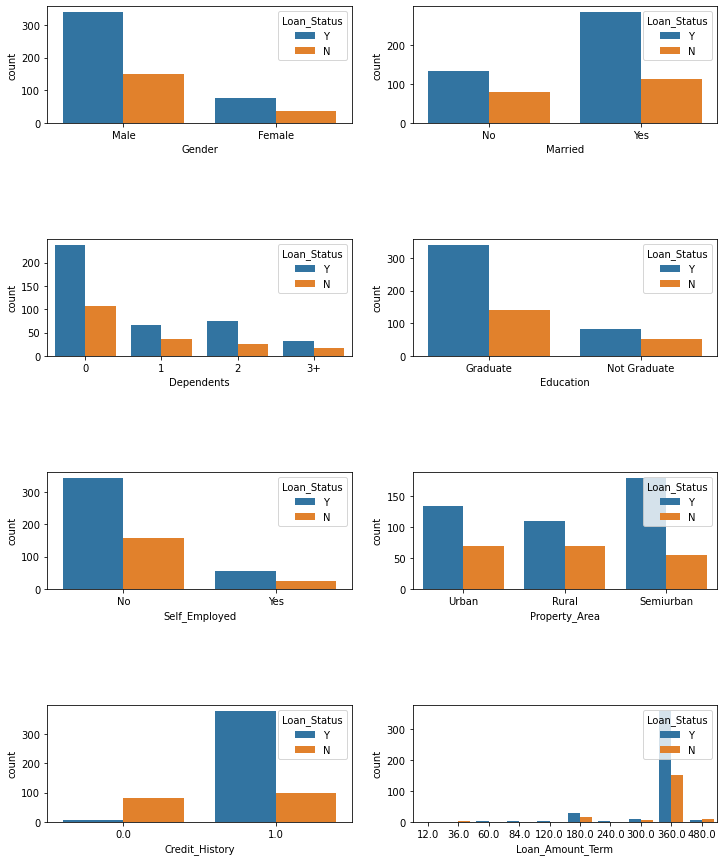

In [89]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categor):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

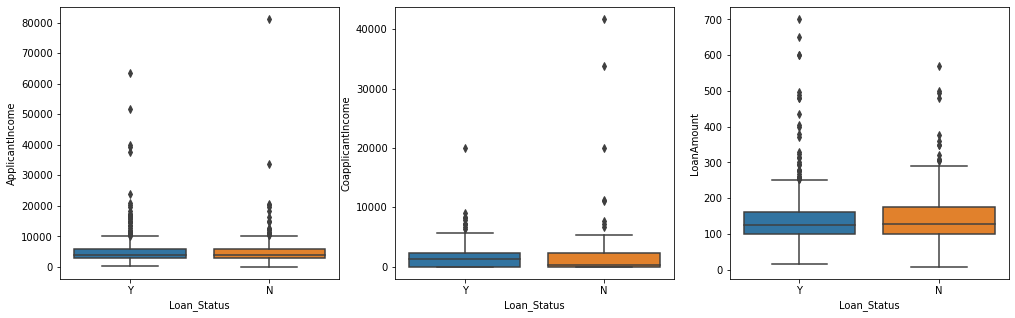

In [90]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(num):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

plt.subplots_adjust(hspace=1)

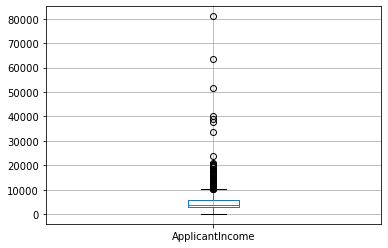

In [91]:
# Box Plot for variable ApplicantIncome of training data set

df.boxplot(column='ApplicantIncome')

The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

C:\Users\rajat\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


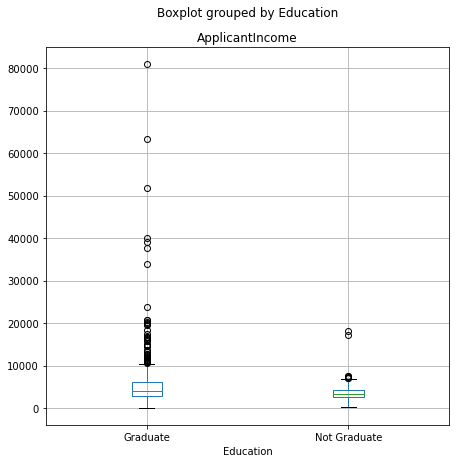

In [92]:
# Box Plot for variable ApplicantIncome by variable Education of training data set
df.boxplot(column='ApplicantIncome', by = 'Education',figsize=(7,7))

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

In [93]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print("No. Of Loans Get Approved: ",loan_approval)

No. Of Loans Get Approved:  422


In [94]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [95]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

## Preprocessing Data
Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

* Encoding Categorical Features.
* Imputing missing values

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [109]:
#see how many Columns have missing values
df_temp.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
# Find the columns which contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [100]:
df_temp = df.copy()

In [101]:
# This will turn all of the string value into category values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [103]:
# Find the columns which contain Numerical
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


In [114]:
 # Filled categorical missing data and turn categories into numbers
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # We add +1 to the category code because pandas encodes missing categories as -1
        df_temp[label] = pd.Categorical(content).codes+1

In [131]:
#see how many Columns have missing values
df_temp.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df_temp.Credit_History.fillna(1,inplace=True)

In [134]:
# Fill all Numeric Values
for label, content in df_temp.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Fill missing numeric values with median
                df_temp[label] = content.fillna(content.mean())

In [135]:
#see how many Columns have missing values
df_temp.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [138]:
########## Split Features and Target Varible ############
X = df_temp.drop(columns='Loan_Status',axis=0)
y = df_temp['Loan_Status']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [143]:
X.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [146]:
y.isna().sum()

0

## Modelling 

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [149]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [150]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\rajat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8617886178861789,
 'KNN': 0.6097560975609756,
 'Random Forest': 0.8292682926829268}

### Model Comparison

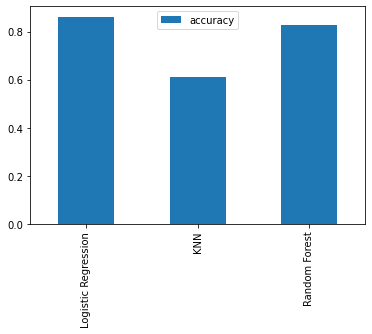

In [151]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [152]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [153]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [160]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [161]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [163]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [164]:
clf.score(X_test, y_test)

0.8617886178861789

In [165]:
# Make predictions with tuned model
y_preds = clf.predict(X_test)
y_preds

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1], dtype=int8)

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [168]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8045715047314408

In [169]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8973039215686274

In [170]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.42145748987854253

In [171]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.5705242905242904

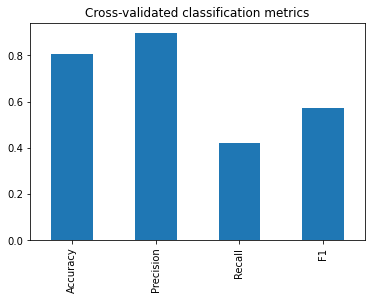

In [172]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [173]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Loan_ID': 0.0002318634714228327,
 'Gender': -0.16165135817564164,
 'Married': 0.22145166834343005,
 'Dependents': 0.06087737309018619,
 'Education': -0.43554643974263607,
 'Self_Employed': -0.14762706143502283,
 'ApplicantIncome': -9.01585227705796e-06,
 'CoapplicantIncome': -5.661161431790298e-05,
 'LoanAmount': -0.00021103887583350954,
 'Loan_Amount_Term': -0.001224709303815241,
 'Credit_History': 2.232221179025605,
 'Property_Area': 0.025785624124057806}

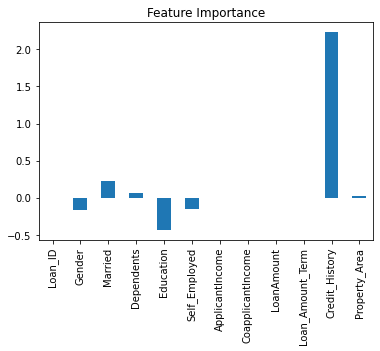

In [174]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);